In [40]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [41]:
#Import dataset 
hansard = pd.read_csv("hansard.csv")
hansard.head()

,id,title,motion,manual motion,govt/opp motion,motion party affiliation,utt1,utt2,utt3,utt4,utt5,manual speech,vote speech,party affiliation,name,rebellion %
0,1,Doctor Assisted Dying,That leave be given to bring in a Bill to enab...,1,1,Lab,I trust that the House will not feel that ther...,If one considers the argument from a religious...,I accept that we shall all face death at one t...,"When we listen to my hon. Friend's case, we mu...",I do not think that we want that sort of socie...,0,0,Lab,Kevin McNamara,3.2
1,2,Local Government Finance (Scotland),That the Local Government Finance (Scotland) O...,1,1,Lab,The Secretary State talks of the lack of fuss ...,The right hon. Gentleman may not have heard fu...,North Tayside.,The Secretary of State's geography is terrible.,Would not the £40 million gap in the assumptio...,0,0,SNP,John Swinney,0.4
2,2,Local Government Finance (Scotland),That the Local Government Finance (Scotland) O...,1,1,Lab,May I assure the right hon. Gentleman that he ...,Will the hon. Gentleman clarify what he meant ...,NaN,NaN,NaN,1,1,Lab,John McAllion,4.5
3,2,Local Government Finance (Scotland),That the Local Government Finance (Scotland) O...,1,1,Lab,"Is the hon. Gentleman aware that, ever since t...","I rise as one who, in the past, has not been a...",It would be inappropriate to allow the debate ...,"Why are the problems of so many of our people,...",Today's debate is the first of this sort under...,0,1,Lab,Ian Davidson,3.1
4,2,Local Government Finance (Scotland),That the Local Government Finance (Scotland) O...,1,1,Lab,The hon. Gentleman will notice that the Childr...,I thank the hon. Gentleman for his generosity ...,NaN,NaN,NaN,1,1,Lab,Maria Fyfe,2.3


In [42]:
#Drop irrelevant columns 
hansard_new = hansard[['title', 'motion', 'utt1', 'utt2', 'utt3', 'utt4', 'utt5']]
hansard_new.head()

,title,motion,utt1,utt2,utt3,utt4,utt5
0,Doctor Assisted Dying,That leave be given to bring in a Bill to enab...,I trust that the House will not feel that ther...,If one considers the argument from a religious...,I accept that we shall all face death at one t...,"When we listen to my hon. Friend's case, we mu...",I do not think that we want that sort of socie...
1,Local Government Finance (Scotland),That the Local Government Finance (Scotland) O...,The Secretary State talks of the lack of fuss ...,The right hon. Gentleman may not have heard fu...,North Tayside.,The Secretary of State's geography is terrible.,Would not the £40 million gap in the assumptio...
2,Local Government Finance (Scotland),That the Local Government Finance (Scotland) O...,May I assure the right hon. Gentleman that he ...,Will the hon. Gentleman clarify what he meant ...,NaN,NaN,NaN
3,Local Government Finance (Scotland),That the Local Government Finance (Scotland) O...,"Is the hon. Gentleman aware that, ever since t...","I rise as one who, in the past, has not been a...",It would be inappropriate to allow the debate ...,"Why are the problems of so many of our people,...",Today's debate is the first of this sort under...
4,Local Government Finance (Scotland),That the Local Government Finance (Scotland) O...,The hon. Gentleman will notice that the Childr...,I thank the hon. Gentleman for his generosity ...,NaN,NaN,NaN


In [43]:
#Fill in missing values 
for col in hansard_new.columns:
    hansard_new[col] = hansard_new[col].fillna(value='Unknown')

In [5]:
#Join columns 
hansard_new = hansard_new.apply(lambda x: " ". join(x), axis=1)
hansard_new.head()

0    Doctor Assisted Dying That leave be given to b...
1    Local Government Finance (Scotland) That the L...
2    Local Government Finance (Scotland) That the L...
3    Local Government Finance (Scotland) That the L...
4    Local Government Finance (Scotland) That the L...
dtype: object

In [32]:
#Text preprocessing
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 

corpus = []

for sentence in hansard_new:
    tokens = word_tokenize(sentence)
    tokens = [word.lower() for word in tokens]
    tokens = [word for word in tokens if word.isalpha()]
    stop_words = stopwords.words('english')
    tokens = [word for word in tokens if not word in stop_words]
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in tokens]
    corpus.append(tokens)

In [75]:
#Train word2vec on the corpus 
import gensim, logging
from gensim.models import Word2Vec
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

model = Word2Vec(corpus, min_count=5)
vocabulary = list(model.wv.vocab)
model.save("model.bin")

2020-08-23 02:00:29,832 : INFO : collecting all words and their counts
2020-08-23 02:00:29,834 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2020-08-23 02:00:29,891 : INFO : collected 10040 word types from a corpus of 182526 raw words and 1251 sentences
2020-08-23 02:00:29,892 : INFO : Loading a fresh vocabulary
2020-08-23 02:00:29,910 : INFO : effective_min_count=5 retains 3583 unique words (35% of original 10040, drops 6457)
2020-08-23 02:00:29,910 : INFO : effective_min_count=5 leaves 171671 word corpus (94% of original 182526, drops 10855)
2020-08-23 02:00:29,932 : INFO : deleting the raw counts dictionary of 10040 items
2020-08-23 02:00:29,932 : INFO : sample=0.001 downsamples 47 most-common words
2020-08-23 02:00:29,932 : INFO : downsampling leaves estimated 157459 word corpus (91.7% of prior 171671)
2020-08-23 02:00:29,949 : INFO : estimated required memory for 3583 words and 100 dimensions: 4657900 bytes
2020-08-23 02:00:29,949 : INFO : resetting la

In [76]:
#Test word similarity
w1 = "government"
model.wv.most_similar(positive=w1, topn=5)

2020-08-23 02:00:32,577 : INFO : precomputing L2-norms of word weight vectors


[('objectives', 0.9604681134223938),
 ('abandon', 0.9354326128959656),
 ('calls', 0.9350258708000183),
 ('ensure', 0.9257967472076416),
 ('stated', 0.9194603562355042)]

In [77]:
#Test word similarity
w2 = "parliament"
model.wv.most_similar(positive=w2, topn=5)

[('bench', 0.9299739599227905),
 ('earlier', 0.9255871176719666),
 ('bodies', 0.9220520257949829),
 ('whip', 0.9200345277786255),
 ('matter', 0.919218897819519)]

In [78]:
#Test word similarity
model.wv.similarity(w1="law", w2="parliament")

0.85307616

In [79]:
#Fit PCA model to vectors
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt

vectors = model[model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(vectors)

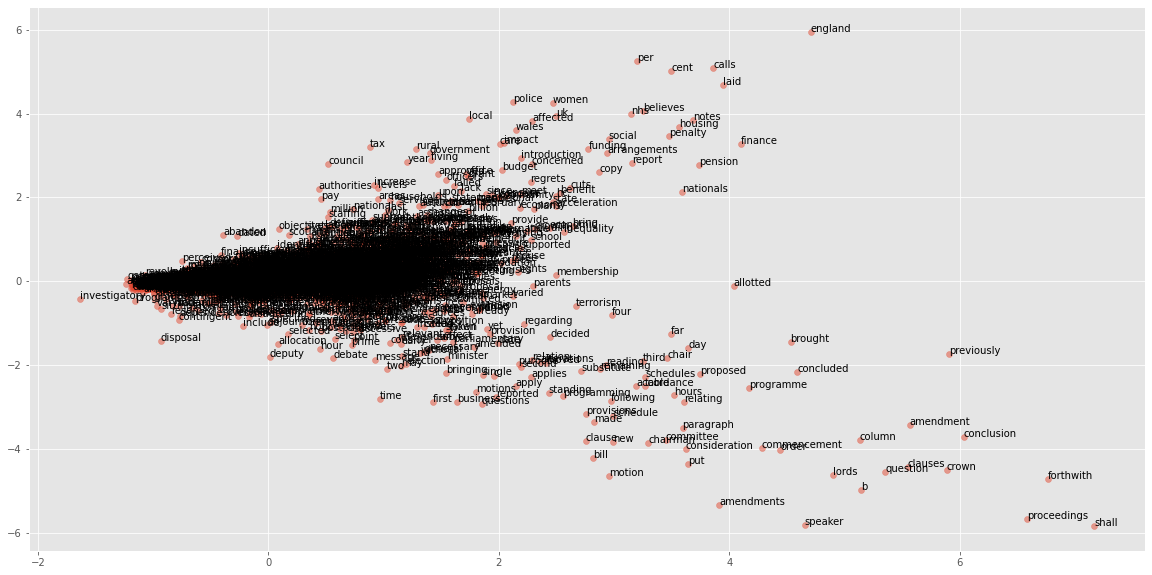

In [80]:
#PCA scatterplot
plt.figure(figsize=(20, 10))
plt.scatter(result[:, 0], result[:, 1], alpha=0.5)
vocabulary = list(model.wv.vocab)
for i, word in enumerate(vocabulary):
    plt.annotate(word, xy=(result[i,0], result[i,1]))

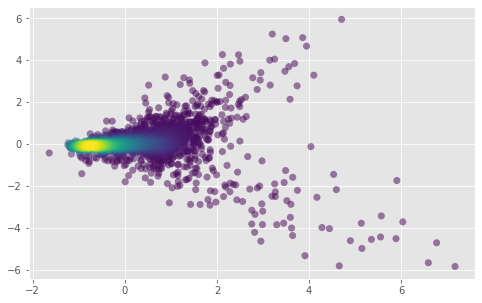

In [87]:
#KDE density plot
from scipy.stats import gaussian_kde
x = result[:,0]
y = result[:, 1]
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)
idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]
plt.figure(figsize=(8, 5))
plt.scatter(x, y, c=z, s=50, edgecolor='', alpha=0.5)
# words = list(model.wv.vocab)
# for i, word in enumerate(words):
#     plt.annotate(word, xy=(result[i,0], result[i,1]))